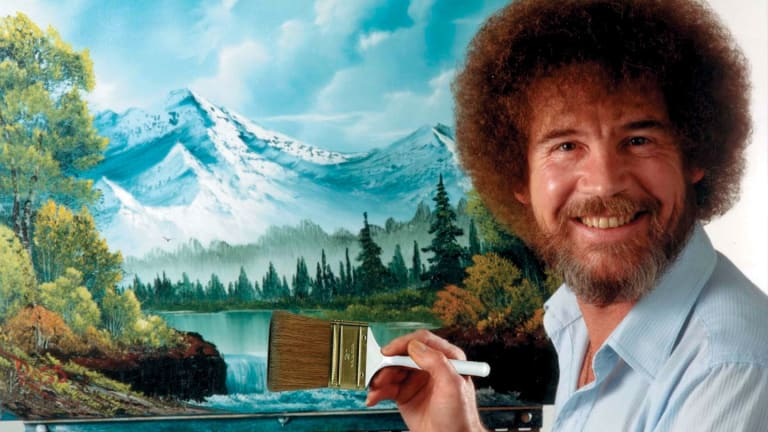

In [55]:
import pandas as pd
import datetime
import time
import requests
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/elements-by-episode (1).csv'
df = pd.read_csv(filename)
df

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,S31E09,"""EVERGREEN VALLEY""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
399,S31E10,"""BALMY BEACH""",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
400,S31E11,"""LAKE AT THE RIDGE""",0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
401,S31E12,"""IN THE MIDST OF WINTER""",0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0


In [25]:
df.duplicated().any()

False

In [26]:
df.dtypes

EPISODE            object
TITLE              object
APPLE_FRAME         int64
AURORA_BOREALIS     int64
BARN                int64
                    ...  
WAVES               int64
WINDMILL            int64
WINDOW_FRAME        int64
WINTER              int64
WOOD_FRAMED         int64
Length: 69, dtype: object

In [29]:
df.columns = df.columns.str.replace('[_]', '')
df.head(5)

,EPISODE,TITLE,APPLEFRAME,AURORABOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLEFRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANEANDRE,DOCK,DOUBLEOVALFRAME,FARM,FENCE,FIRE,FLORIDAFRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALFCIRCLEFRAME,HALFOVALFRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVALFRAME,PALMTREES,PATH,PERSON,PORTRAIT,RECTANGLE3DFRAME,RECTANGULARFRAME,RIVER,ROCKS,SEASHELLFRAME,SNOW,SNOWYMOUNTAIN,SPLITFRAME,STEVEROSS,STRUCTURE,SUN,TOMBFRAME,TREE,TREES,TRIPLEFRAME,WATERFALL,WAVES,WINDMILL,WINDOWFRAME,WINTER,WOODFRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [44]:
df = df[df.columns.drop(list(df.filter(regex='FRAME')))]

In [ ]:
df

In [33]:
df.drop(['DIANEANDRE', 'AURORABOREALIS'], axis=1)

,EPISODE,TITLE,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DOCK,FARM,FENCE,FIRE,FLOWERS,FOG,GRASS,GUEST,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,PALMTREES,PATH,PERSON,PORTRAIT,RIVER,ROCKS,SNOW,SNOWYMOUNTAIN,STEVEROSS,STRUCTURE,SUN,TREE,TREES,WATERFALL,WAVES,WINDMILL,WINTER
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1
3,S01E04,"""WINTER MIST""",0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,S31E09,"""EVERGREEN VALLEY""",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0
399,S31E10,"""BALMY BEACH""",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
400,S31E11,"""LAKE AT THE RIDGE""",0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0
401,S31E12,"""IN THE MIDST OF WINTER""",1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1


In [34]:
df.sum(axis=0) 

EPISODE           S01E01S01E02S01E03S01E04S01E05S01E06S01E07S01E...
TITLE             "A WALK IN THE WOODS""MT. MCKINLEY""EBONY SUNS...
AURORABOREALIS                                                    2
BARN                                                             17
BEACH                                                            27
BOAT                                                              2
BRIDGE                                                            7
BUILDING                                                          1
BUSHES                                                          120
CABIN                                                            69
CACTUS                                                            4
CIRRUS                                                           28
CLIFF                                                             8
CLOUDS                                                          179
CONIFER                                         

In [35]:
df.sum(axis=1) 

0       6
1       9
2      10
3       8
4       5
       ..
398     8
399     5
400    12
401    10
402     5
Length: 403, dtype: int64

In [53]:
Sum_Of_Each_Picture = df.sum(axis=0)
Sum_Of_Each_Ep = df.sum(axis=1)
df_sum = df.groupby([Sum_Of_Each_Picture, Sum_Of_Each_Ep])
data = Sum_Of_Each_Picture

In [60]:
df['CABIN'].count()

403

In [65]:
cabins = df['CABIN'].cumsum()
mountains = df['MOUNTAIN'].cumsum()

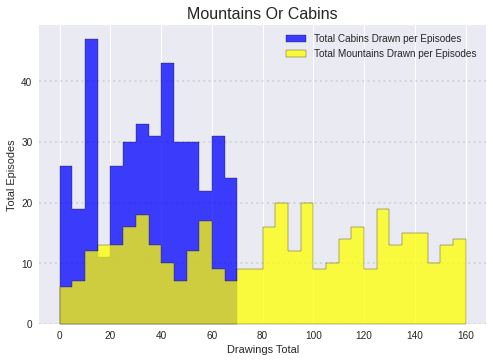

In [105]:
sns.histplot(cabins, label = 'Total Cabins Drawn per Episodes', color= 'blue', edgecolor='black',binwidth=5, bins=5, element="step")
sns.histplot(mountains, label = 'Total Mountains Drawn per Episodes', color= 'yellow', edgecolor='black', binwidth=5, bins=10, element="step")
plt.xlabel('Drawings Total')
plt.ylabel('Total Episodes')
plt.title('Mountains Or Cabins', fontsize = 16)
plt.grid(color='#95a5a6', linestyle=':', linewidth=2, axis='y', alpha=0.3)
plt.legend();

#Conclusion 

I wanted to find out how many cabins and mountains Bob Ross made in the 60 episodes of his show. He had a total of 160+ mountains spread over the 60 total ep. But as we can see in the above graph mountains were only present in the first 20 ep of the series, where as Cabins were present in every single ep of the series. So all of this is to say that Bob ross loved his Cabins and honestly at one point he loved his mountains also!